In [3]:
import pandas as pd
wine = pd.read_csv("DataSet/Red Wine Quality.csv",sep=";")

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [6]:
# 説明変数に "density (濃度)" を利用
X = wine['density']
 
# 目的変数に "alcohol (アルコール度数)" を利用
Y = wine['alcohol']


<function matplotlib.pyplot.show(close=None, block=None)>

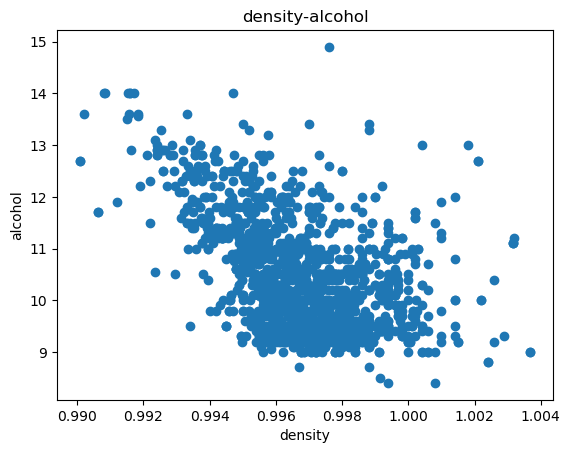

In [20]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y)
plt.xlabel("density")
plt.ylabel("alcohol")
plt.title("density-alcohol")
plt.show

In [37]:

# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "density (濃度)" を利用
X = wine.loc[:, ['density']].values
 
# 目的変数に "alcohol (アルコール度数)" を利用
Y = wine['alcohol'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
print("回归系数",clf.coef_)
 
# 切片 (誤差)
print("切片",clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))

#[alcohol] = -280.16382307 × [density] + 289.675343383
print(clf.predict(X))

回归系数 [-280.16382307]
切片 289.67534338256496
0.24619436439710707
[10.12788073 10.40804455 10.35201178 ... 10.7050182  10.78066243
 10.77505916]


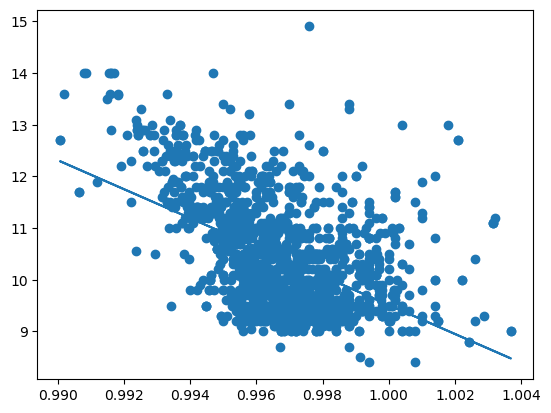

In [35]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, clf.predict(X))

In [38]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine['quality'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

                    Name  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334
21.965208449448774
